## Libraries executar antes do load

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## Preprocessing the Training Set executar antes do load

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         
    shear_range=0.2,       
    zoom_range=0.2,           
    horizontal_flip=True      
)
train_set = train_datagen.flow_from_directory(
    'faces/train/',
    target_size=(128, 128),   
    batch_size=32,
    class_mode='categorical'       
)

Found 48 images belonging to 3 classes.


## Preprocessing the Test Set executar antes do load

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Carregar o conjunto de validação
test_set = test_datagen.flow_from_directory(
    'faces/test/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 14 images belonging to 3 classes.


## Convolution Pooling Flattening

In [8]:
# Passo 1: Carregar o modelo MobileNetV2 pré-treinado
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

In [9]:
base_model.trainable = False

In [10]:
model = Sequential([
    base_model,                      # Modelo pré-treinado
    Flatten(),                       # Achatar a saída do modelo base
    Dense(256, activation='relu'),   # Camada densa com 256 neurônios
    Dropout(0.2),                    # Dropout para evitar overfitting
    Dense(3, activation='softmax')   # Camada final com 3 classes (softmax)
])

## Traning the CNN

In [12]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     5,243,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,501,891 (28.62 MB)

 Trainable params: 5,243,907 (20.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
history = model.fit(x = train_set, validation_data = test_set, epochs = 50)

C:\Users\Gabriel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3542 - loss: 5.9490

C:\Users\Gabriel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3472 - loss: 7.3967 - val_accuracy: 0.3571 - val_loss: 10.0427
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6562 - loss: 4.1091 - val_accuracy: 0.5000 - val_loss: 6.3424
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.6389 - loss: 2.4740 - val_accuracy: 0.6429 - val_loss: 2.2171
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9132 - loss: 0.3974 - val_accuracy: 0.8571 - val_loss: 0.7305
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8507 - loss: 0.5934 - val_accuracy: 0.7857 - val_loss: 0.8880
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8333 - loss: 0.8243 - val_accuracy: 0.6429 - val_loss: 1.6406
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.6429 - val_loss: 3.4670
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.9722 - loss: 0.2195 - val_accuracy: 0.6429 - val_loss: 4.9577
Epoch

In [15]:
##model.save('reconhecimento_facial.keras')

## resultados

In [17]:
##model = load_model('reconhecimento_facial.keras', compile=False)

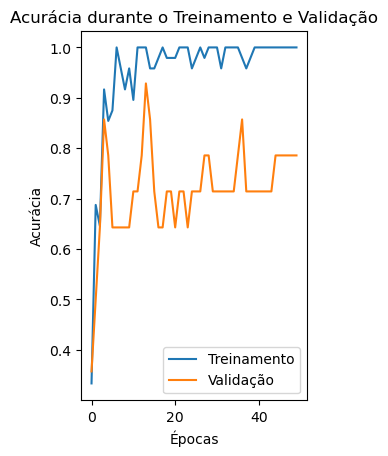

In [18]:
# Plotando Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

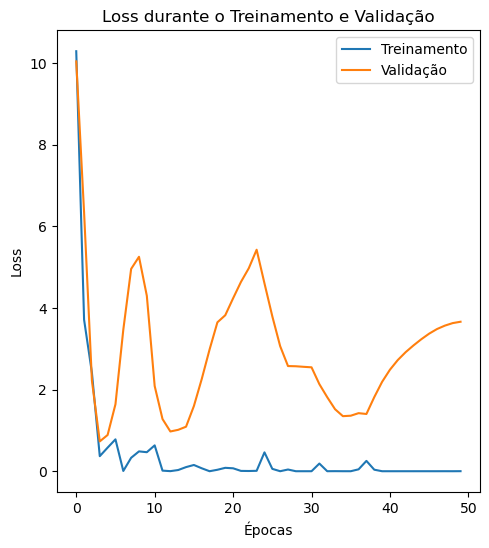

In [19]:
# Plotando Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o Treinamento e Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

In [45]:
# Inicializar x_test e y_test como listas vazias
x_test = []
y_test = []

# Percorrer o gerador de teste para obter os dados
for images, labels in test_set:  # test_set é o gerador de teste
    x_test.extend(images)        # Adicionar imagens
    y_test.extend(labels)        # Adicionar rótulos
    
    # Parar quando todos os dados forem carregados
    if len(x_test) >= test_set.samples:
        break

# Converter listas em arrays numpy
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (14, 128, 128, 3)
y_test shape: (14, 3)


In [49]:
# Fazer previsões
y_pred_prob = model.predict(x_test)  # Previsões em forma de probabilidades

# Converter probabilidades para classes
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # Para múltiplas classes (softmax)
y_test_classes = np.argmax(y_test, axis=1)       # Converter y_test de one-hot para classes

print(f"Previsões: {y_pred_classes}")
print(f"Rótulos verdadeiros: {y_test_classes}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Previsões: [1 1 2 2 0 1 2 1 2 2 1 1 1 0]
Rótulos verdadeiros: [0 1 2 2 0 1 2 0 2 2 1 1 0 0]


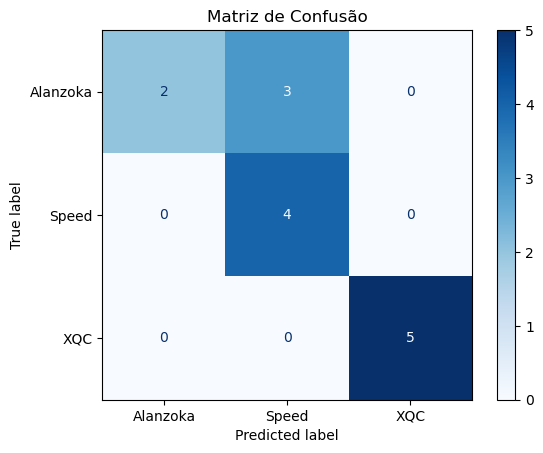

In [51]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()